# Master I Informatique
## Intelligence Artificielle
### Introduction au Deep Learning - CNN

Dans ce note book, nous allons utiliser keras pour concevoir et entrainer un réseau de neurones avec une architecture CNN.

La chargement, le découpage et en général le prétraitement des données reste le même. Ce qui change essentiellement c'est l'architecture du réseau.

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#To input our values in our network Conv2D layer, we need to reshape the datasets, i.e.,
# pass from (60000, 28, 28) to (60000, 28, 28, 1) where 1 is the number of channels of our images
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

La commence réellement l'utilisation des CNN. Nous avons besoin d'importer un certain nombre d'autres éléments de la bibliothèque keras :

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import adam

Et on définit notre réseau :

In [5]:
num_classes = 10

#Convert class vectors to binary class matrices ("one hot encoding")
## Doc : https://keras.io/utils/#to_categorical
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [6]:
def cnn():
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(Conv2D(64,
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

On créee donc notre réseau :

In [7]:
model = cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

et on l'antraine :

In [8]:
batch_size=64
epochs=5

hist = model.fit(X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=epochs,
            batch_size=batch_size)            

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 891us/step - loss: 0.1294 - accuracy: 0.9612 - val_loss: 0.0459 - val_accuracy: 0.9850
Epoch 2/5
60000/60000 [==============================] - 56s 927us/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 3/5
60000/60000 [==============================] - 55s 915us/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0367 - val_accuracy: 0.9881
Epoch 4/5
60000/60000 [==============================] - 54s 906us/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0370 - val_accuracy: 0.9890
Epoch 5/5
60000/60000 [==============================] - 55s 909us/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0410 - val_accuracy: 0.9885


Test loss:  0.041007108035768396
Test accuracy:  0.9884999990463257


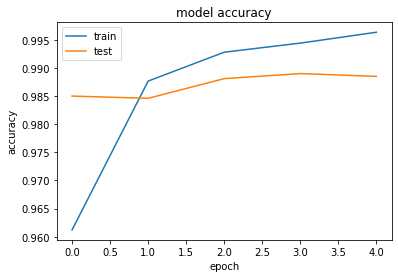

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
#plot accuracies
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()